In [ ]:
# TO DO: Auto load in multiple datasets

In [39]:
# Library Imports

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.models import load_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Import the dataset

dataset = pd.read_csv('data/GOOG.csv')
dataset = dataset[['Open', 'High', 'Low', 'Close']]

# Feature Engineering 

dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Close'] - dataset['Open']
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['Close'].rolling(5).std()


In [41]:
'''
Identify price rises. Using a binary variable, 1, to indicate when
the closing price of the next day is greater than the closing price of prior day.
'''

dataset['Price_Rise'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)

In [42]:
# Drop NAN values

dataset = dataset.dropna()

dataset.head()

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise
30,96.438522,99.546875,96.179497,97.250481,3.367378,0.811959,94.374593,98.017605,96.714490,1.657058,1
31,96.986473,99.292824,96.787216,98.834541,2.505608,1.848068,95.578415,98.183483,96.590289,2.349867,0
32,98.545624,99.502045,98.037529,98.580498,1.464516,0.034874,97.406563,97.807393,96.655212,2.227804,1
33,98.884354,99.048744,97.962814,98.605400,1.085930,-0.278954,98.221840,97.161813,96.728106,1.158720,0
34,97.883110,99.078629,94.839516,95.327690,4.239113,-2.555420,98.673480,96.842509,96.884187,1.475651,1


In [43]:
# Seperate target variable and drop target variable from df

df = dataset.drop('Price_Rise', axis=1)
y = dataset['Price_Rise']

In [44]:
# Split the Dataset

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, 
                                                    random_state=42)

In [45]:
'''
Establish a Baseline & Domain Insight:

Objective: to accomplish a better accuracy % then our baseline of 51.7 pct. 
Why such a low baseline? Casino's make their money with 51%/49% odds. Any rate
better then a 51% accuracy rate should be considered as a success.
'''

y_train.value_counts(normalize=True)

1    0.517904
0    0.482096
Name: Price_Rise, dtype: float64

In [46]:
'''
Feature Scaling and Standardizing:

This ensures that there is no bias while training the model due to the 
different scales of all input features. If this is not done the neural 
network might get confused and give a higher weight to those features 
which have a higher average value than others.
'''

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
'''
NN Notes:

Units: This defines the number of nodes or neurons in that particular layer. 
We have set this value to 128, meaning there will be 128 neurons in our hidden layer.

Kernel_initializer: This defines the starting values for the weights of the 
different neurons in the hidden layer. We have defined this to be ‘uniform’, 
which means that the weights will be initialized with values from a uniform distribution.

Activation: This is the activation function for the neurons in the particular hidden layer. 
Here we define the function as the rectified Linear Unit function or ‘relu’.

Inputs: This defines the number of inputs to the hidden layer, we have defined this 
value to be equal to the number of columns of our input feature dataframe. 
This argument will not be required in the subsequent layers, as the model will know 
how many outputs the previous layer produced.
'''

'\nNN Notes:\n\nUnits: This defines the number of nodes or neurons in that particular layer. \nWe have set this value to 128, meaning there will be 128 neurons in our hidden layer.\n\nKernel_initializer: This defines the starting values for the weights of the \ndifferent neurons in the hidden layer. We have defined this to be ‘uniform’, \nwhich means that the weights will be initialized with values from a uniform distribution.\n\nActivation: This is the activation function for the neurons in the particular hidden layer. \nHere we define the function as the rectified Linear Unit function or ‘relu’.\n\nInputs: This defines the number of inputs to the hidden layer, we have defined this \nvalue to be equal to the number of columns of our input feature dataframe. \nThis argument will not be required in the subsequent layers, as the model will know \nhow many outputs the previous layer produced.\n'

In [48]:
'''
Variables for NN - Adjust as neccessary. 
'''
epochs = 100
batch_size = 10
inputs = X_train.shape[1]

In [49]:
'''
Building the NN
'''

model = Sequential()

# Two Hidden Layers

model.add(Dense(128, activation='relu', input_shape=(inputs,)))
model.add(Dense(128, activation='relu'))

# Output Layer

model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the Model

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['acc'])

In [51]:
# save model

def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(inputs,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['acc'])
    return model


model.save('./models/goog_model.h5', include_optimizer=True)

In [52]:
# Fit and Train Model

model.fit(X_train, y_train, 
          batch_size = batch_size, 
          epochs = epochs)

Epoch 1/100
3072/3072 [==============================] - 1s 176us/step - loss: 0.2509 - acc: 0.5003
Epoch 2/100
3072/3072 [==============================] - 0s 160us/step - loss: 0.2499 - acc: 0.5189
Epoch 3/100
3072/3072 [==============================] - 0s 147us/step - loss: 0.2497 - acc: 0.5140
Epoch 4/100
3072/3072 [==============================] - 0s 141us/step - loss: 0.2495 - acc: 0.5179
Epoch 5/100
3072/3072 [==============================] - 0s 161us/step - loss: 0.2493 - acc: 0.5257
Epoch 6/100
3072/3072 [==============================] - 0s 135us/step - loss: 0.2494 - acc: 0.5212
Epoch 7/100
3072/3072 [==============================] - 0s 134us/step - loss: 0.2490 - acc: 0.5273
Epoch 8/100
3072/3072 [==============================] - 0s 134us/step - loss: 0.2490 - acc: 0.5189
Epoch 9/100
3072/3072 [==============================] - 0s 134us/step - loss: 0.2489 - acc: 0.5241
Epoch 10/100
3072/3072 [==============================] - 0s 138us/step - loss: 0.2489 - acc: 0.5316

In [53]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import optimizers

def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(inputs,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['acc'])
    return model

# prep for grid search

model = KerasClassifier(build_fn=create_model, verbose=0)

# define Grid Search params

param_grid = {'batch_size': [20, 60, 80, 100, 200],
             'epochs': [20]}

grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                   n_jobs=1)
grid_result = grid.fit(X_train, y_train)

In [54]:
# report results

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

means = grid_result.cv_results_['mean_test_score']

stds = grid_result.cv_results_['std_test_score']

params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.5084635416666666 using {'batch_size': 80, 'epochs': 20}
Means: 0.5052083333333334, Stdev: 0.00852591201413333 with: {'batch_size': 20, 'epochs': 20}
Means: 0.5078125, Stdev: 0.01759620019757758 with: {'batch_size': 60, 'epochs': 20}
Means: 0.5084635416666666, Stdev: 0.0018414239093399675 with: {'batch_size': 80, 'epochs': 20}
Means: 0.5065104166666666, Stdev: 0.013397861736495232 with: {'batch_size': 100, 'epochs': 20}
Means: 0.5016276041666666, Stdev: 0.016750885846703915 with: {'batch_size': 200, 'epochs': 20}


In [55]:
# tune optimizer

from tensorflow.keras import optimizers

def create_model(learn_rate=0.001):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(inputs,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(lr=learn_rate),
                  loss='mean_squared_error',
                  metrics=['acc'])
    return model

# prepare for grid search

model = KerasClassifier(build_fn=create_model, verbose=0)

# optimize with optimizer

param_grid = {'batch_size': [20], 
              'epochs': [20], 
              'learn_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5]}

grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    n_jobs=1)

grid_result = grid.fit(X_train, y_train)

In [56]:
# report results

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")



Best: 0.5182291666666666 using {'batch_size': 20, 'epochs': 20, 'learn_rate': 0.01}
Means: 0.5146484375, Stdev: 0.009700302360515195 with: {'batch_size': 20, 'epochs': 20, 'learn_rate': 0.001}
Means: 0.5182291666666666, Stdev: 0.0033196741624953027 with: {'batch_size': 20, 'epochs': 20, 'learn_rate': 0.01}
Means: 0.4964192708333333, Stdev: 0.017835452515368132 with: {'batch_size': 20, 'epochs': 20, 'learn_rate': 0.1}
Means: 0.5087890625, Stdev: 0.01592725237333993 with: {'batch_size': 20, 'epochs': 20, 'learn_rate': 0.2}
Means: 0.5179036458333334, Stdev: 0.003222491841344943 with: {'batch_size': 20, 'epochs': 20, 'learn_rate': 0.3}
Means: 0.5179036458333334, Stdev: 0.003222491841344943 with: {'batch_size': 20, 'epochs': 20, 'learn_rate': 0.5}


In [57]:
# tune epochs

def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(inputs,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(lr=0.01),
                  loss='mean_squared_error',
                  metrics=['acc'])
    return model

# prepare for grid search

model = KerasClassifier(build_fn=create_model, verbose=0)

# define grid search params

param_grid = {'batch_size': [20], 
              'epochs': [50, 100, 200, 500]}

grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    n_jobs=1)

grid_result = grid.fit(X_train, y_train)

In [58]:
# Report Results

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.5198567708333334 using {'batch_size': 20, 'epochs': 500}
Means: 0.5104166666666666, Stdev: 0.0020066451832581305 with: {'batch_size': 20, 'epochs': 50}
Means: 0.5182291666666666, Stdev: 0.002800236089532105 with: {'batch_size': 20, 'epochs': 100}
Means: 0.5133463541666666, Stdev: 0.008783032267729194 with: {'batch_size': 20, 'epochs': 200}
Means: 0.5198567708333334, Stdev: 0.007866566389058968 with: {'batch_size': 20, 'epochs': 500}


In [59]:
model.fit(X_train, y_train, 
          batch_size=20, 
          epochs=500)

In [60]:
'''
Predict the Movement of Stock:

Now that the neural network has been compiled, use the predict() method for making the prediction. 
Pass X_test as its argument and store the result in a variable named ypred. 
Then convert ypred to store binary values by storing the condition ypred > 5. 
Now, the variable y_pred stores either True or False depending on whether the 
predicted value was greater or less than 0.5.
'''

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [61]:
'''
Next, create a new column in the dataframe dataset with the column header ‘ypred’ 
and store NaN values in the column. 
Then store the values of ypred into this new column, starting from the rows of the test dataset. 
This is done by slicing the dataframe using the iloc method as shown in the code below. 
Then drop all the NaN values from the dataset and store them in a new dataframe named trade_dataset.
'''

dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
trade_dataset = dataset.dropna()

In [62]:
# Computing Strategy Returns

trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

In [63]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

In [64]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

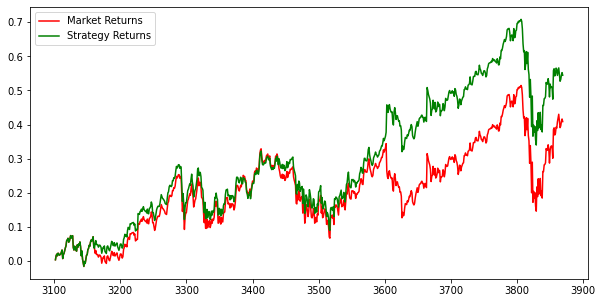

In [65]:
# Graph the Results

plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

In [ ]:
# Consider: Gather more data points (+100,000) for a more accurate model